### EDA

The key features of the audio data are namely, MFCC (Mel Frequency Cepstral Coefficients), Mel Spectrogram and Chroma.

1. MFCC (Mel Frequency Cepstral Coefficients)- MFCC is taken on a Mel scale which is a scale that relates the perceived frequency of a tone to the actual measured frequency. It scales the frequency in order to match more closely what the human ear can hear. The envelope of the temporal power spectrum of the speech signal is representative of the vocal tract and MFCC accurately represents this envelope.
2. Mel Spectrogram- A Fast Fourier Transform is computed on overlapping windowed segments of the signal, and we get what is called the spectrogram. This is just a spectrogram that depicts amplitude which is mapped on a Mel scale.

3. Chroma- A Chroma vector is typically a 12-element feature vector indicating how much energy of each pitch class is present in the signal in a standard chromatic scale.

For the EDA we have used MFCC and Mel Spectogram

#### Data Source Used

We have used the RAVDESS dataset in this project:

Files

This portion of the RAVDESS contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

File naming convention

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

1. Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
2. Vocal channel (01 = speech, 02 = song).
3. Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
4. Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
5. Repetition (01 = 1st repetition, 02 = 2nd repetition).
6. Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [ ]:
#!pip install soundfile numpy librosa soundfile 

In [ ]:
import soundfile
import glob

import warnings
warnings.filterwarnings('ignore')

import librosa
import librosa.display

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Audio

import numpy as np
from matplotlib.pyplot import specgram
import pandas as pd
import os # interface with underlying OS that python is running on
import sys
import seaborn as sns

import IPython.display as ipd  # To play sound in the notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
RAV = "/content/drive/MyDrive/dataset/audio_speech_actors_01-24/"
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_sad           96
male_happy         96
male_angry         96
male_calm          96
male_fear          96
male_surprise      96
male_disgust       96
female_happy       96
female_calm        96
female_sad         96
female_angry       96
female_surprise    96
female_fear        96
female_disgust     96
male_neutral       48
female_neutral     48
Name: labels, dtype: int64

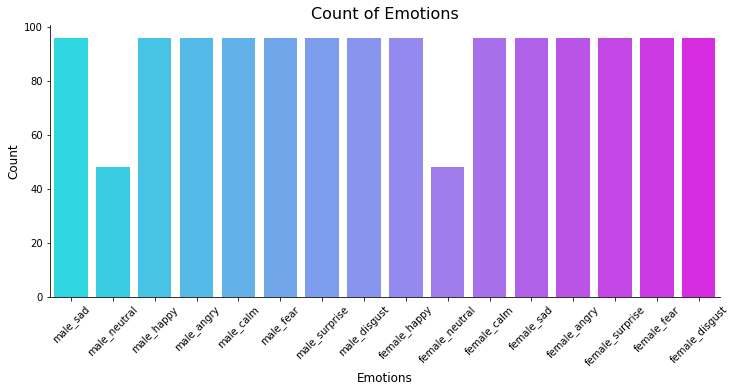

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('Count of Emotions', size=16)
sns.countplot(RAV_df.labels, palette='cool')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
plt.xticks(rotation=45)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()

Compare mel spectograms of male and female neutral audio clips

In [ ]:
# MALE NEUTRAL
fname1=RAV+'Actor_01/03-01-01-01-01-01-01.wav'
data, sr = librosa.load(fname1)
ipd.Audio(fname1) 

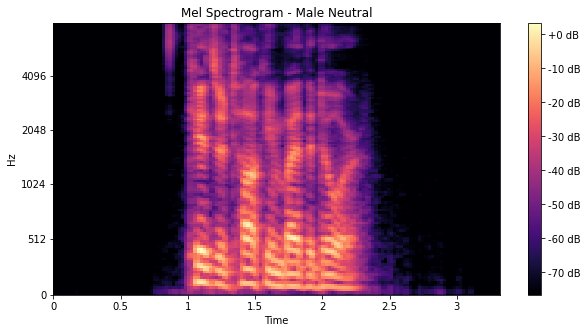

In [ ]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Neutral')
plt.colorbar(format='%+2.0f dB');

In [ ]:
# FEMALE NEUTRAL
fname2=RAV+'Actor_14/03-01-01-01-01-01-14.wav'
data, sr = librosa.load(fname2)
ipd.Audio(fname2) 

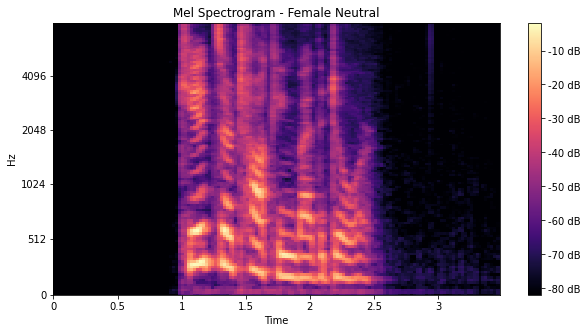

In [ ]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Neutral')
plt.colorbar(format='%+2.0f dB');

Compare the waveplots of happy and fearful tracks

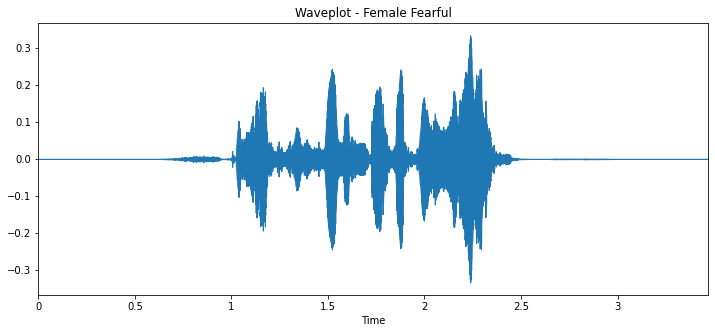

In [ ]:
# Pick a fearful track
fname3 = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'  
data, sr = librosa.load(fname3)
plt.figure(figsize=(12, 5))
librosa.display.waveplot(data, sr=sr)
plt.title('Waveplot - Female Fearful')
# Lets play the audio 
ipd.Audio(fname3)

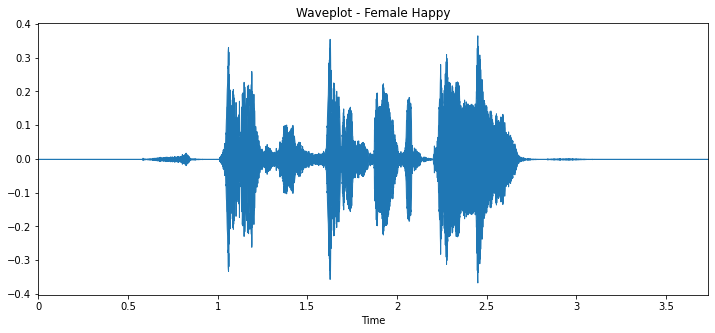

In [ ]:
# Pick a happy track
fname4 = RAV + 'Actor_14/03-01-03-02-02-02-14.wav'  
data, sr = librosa.load(fname4)
plt.figure(figsize=(12, 5))
librosa.display.waveplot(data, sr=sr)
plt.title('Waveplot - Female Happy')

# Lets play the audio 
ipd.Audio(fname4)

MFCC feature for male and female angry audio clips

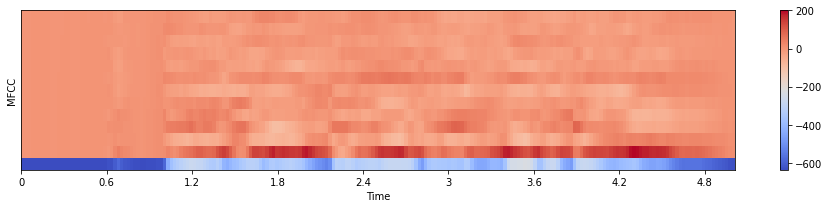

In [ ]:
# Gender - Female; Emotion - Angry 
path = RAV+"/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

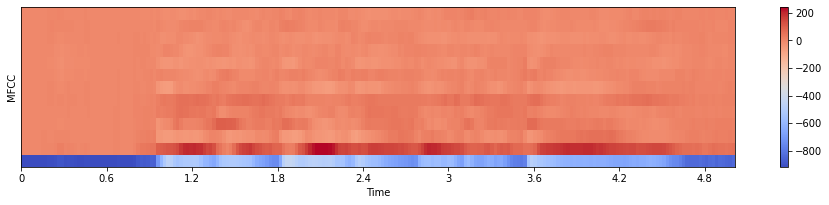

In [ ]:
# Gender - Male; Emotion - Angry 
path = RAV+"/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

216
216


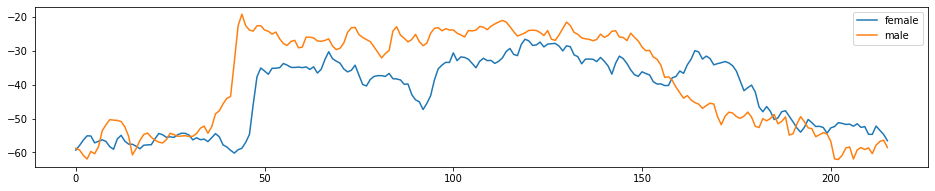

In [ ]:
# Gender - Female; Emotion - happy 
path = RAV+"/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Gender - Male; Emotion - happy 
path = RAV+"/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(16,10))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

For the same sentence being uttered, there is a clear distint difference between male and female in that females tends to have a higher pitch.

### Training the Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# all emotions on RAVDESS dataset
emotionCollective = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

In [ ]:
emotionAvailable = {
    "angry",
    "sad",
    "neutral",
    "happy"
}

In [ ]:
def extract_feature(file_name, mfcc, chroma, mel):
    X, sample_rate = librosa.load(os.path.join(file_name), res_type='kaiser_fast')
    if chroma:
        stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
    if chroma:
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result

In [ ]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob('/content/drive/MyDrive/dataset/Actor_*/*.wav'):
        # get the base name of the audio file
        file_name=os.path.basename(file)
        # get the base name of the audio file
        emotion=emotionCollective[file_name.split("-")[2]]
        if emotion not in emotionAvailable:
            continue
        # get the base name of the audio file
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        # add to data
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, train_size= 0.75,random_state=9)

In [ ]:
# Split the dataset
import time
X_train, X_test, y_train, y_test = load_data(test_size=0.25)

In [ ]:
# number of samples in training data
print("[+] Number of training samples:", X_train.shape[0])
# number of samples in testing data
print("[+] Number of testing samples:", X_test.shape[0])
# number of features used
# this is a vector of features extracted 
# using utils.extract_features() method
print("[+] Number of features:", X_train.shape[1])

[+] Number of training samples: 504
[+] Number of testing samples: 168
[+] Number of features: 180


In [ ]:
params = {
'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

In [ ]:
# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
mlpc = MLPClassifier(**params)
mlpc.fit(X_train, y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

### Results

In [ ]:
# predict 25% of data to measure how good we are
y_pred = mlpc.predict(X_test)

# calculate the accuracy
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))

# now we save the model
# make result directory if doesn't exist yet

Accuracy: 65.48%


In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       angry       0.79      0.88      0.83        51
       happy       0.59      0.71      0.64        41
     neutral       0.42      0.58      0.49        24
         sad       0.76      0.42      0.54        52

    accuracy                           0.65       168
   macro avg       0.64      0.65      0.63       168
weighted avg       0.68      0.65      0.65       168



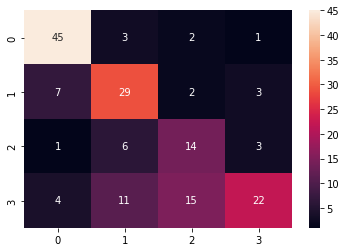

In [ ]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

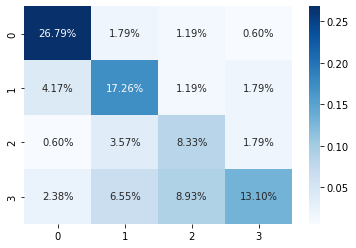

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

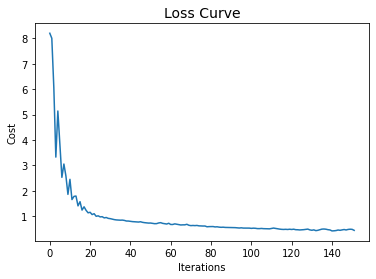

In [ ]:
plt.plot(mlpc.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

### Export & Testing

In [ ]:
# now we save the model
# make result directory if doesn't exist yet
import pickle
if not os.path.isdir("result"):
    os.mkdir("result")

pickle.dump(mlpc, open("result/mlpc.model", "wb"))

In [ ]:
filename = "/content/drive/MyDrive/dataset/Actor_01/03-01-01-01-01-01-01.wav"
    # extract features and reshape it
features = extract_feature(filename, mfcc=True, chroma=True, mel=True).reshape(1, -1)
    # predict
result = mlpc.predict(features)[0]
    # show the result !
print("result:", result)

result: happy
